In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

from swing3dify.visualizations import show_3d_human_pose, show_3d_swing

In [2]:
df = pd.read_csv('../data/sample/3d_position_data.csv')
df.head()

,frame,NOSE_x,NOSE_y,NOSE_z,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_z,RIGHT_EYE_x,RIGHT_EYE_y,RIGHT_EYE_z,LEFT_EAR_x,LEFT_EAR_y,LEFT_EAR_z,RIGHT_EAR_x,RIGHT_EAR_y,RIGHT_EAR_z,LEFT_SHOULDER_x,LEFT_SHOULDER_y,LEFT_SHOULDER_z,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,RIGHT_SHOULDER_z,LEFT_ELBOW_x,LEFT_ELBOW_y,LEFT_ELBOW_z,RIGHT_ELBOW_x,RIGHT_ELBOW_y,RIGHT_ELBOW_z,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_WRIST_z,RIGHT_WRIST_x,RIGHT_WRIST_y,RIGHT_WRIST_z,LEFT_HIP_x,LEFT_HIP_y,LEFT_HIP_z,RIGHT_HIP_x,RIGHT_HIP_y,RIGHT_HIP_z,LEFT_KNEE_x,LEFT_KNEE_y,LEFT_KNEE_z,RIGHT_KNEE_x,RIGHT_KNEE_y,RIGHT_KNEE_z,LEFT_ANKLE_x,LEFT_ANKLE_y,LEFT_ANKLE_z,RIGHT_ANKLE_x,RIGHT_ANKLE_y,RIGHT_ANKLE_z,TOE_x,TOE_y,TOE_z,HOSEL_x,HOSEL_y,HOSEL_z,GRIP_x,GRIP_y,GRIP_z
0,0,0.261836,-0.214363,-1.041080,0.257138,-0.208978,-1.042836,0.266807,-0.209125,-1.044745,0.246980,-0.206849,-1.051768,0.273679,-0.207237,-1.054391,0.233056,-0.234354,-1.070148,0.277663,-0.231395,-1.054695,0.237478,-0.277682,-1.060141,0.267261,-0.275589,-1.043699,0.242688,-0.314611,-1.034086,0.250234,-0.315301,-1.028212,0.238617,-0.310309,-1.080839,0.274955,-0.305403,-1.069182,0.223372,-0.376166,-1.062500,0.285782,-0.368916,-1.045367,0.209382,-0.436113,-1.042630,0.295154,-0.426572,-1.023882,0.191600,-0.408331,-0.844242,0.196562,-0.412004,-0.864584,0.236989,-0.334131,-1.010029
1,1,0.261679,-0.214408,-1.041027,0.256931,-0.209003,-1.042817,0.266720,-0.209036,-1.044537,0.246824,-0.206813,-1.051948,0.273752,-0.206943,-1.054267,0.233067,-0.234227,-1.070541,0.278046,-0.230957,-1.054714,0.237577,-0.277473,-1.059855,0.267467,-0.274856,-1.043390,0.242668,-0.314549,-1.034127,0.250147,-0.315206,-1.028468,0.238988,-0.309364,-1.080727,0.275538,-0.304401,-1.068819,0.223463,-0.375600,-1.062827,0.286519,-0.368461,-1.044535,0.209757,-0.435259,-1.042850,0.295106,-0.426436,-1.024238,0.190995,-0.409337,-0.844191,0.196330,-0.412764,-0.864247,0.236988,-0.334602,-1.009663
2,2,0.260453,-0.215161,-1.043505,0.255725,-0.209742,-1.045220,0.265835,-0.209679,-1.046213,0.246446,-0.206967,-1.053057,0.273666,-0.206935,-1.054217,0.233256,-0.234001,-1.070034,0.278583,-0.230832,-1.054367,0.237405,-0.277183,-1.059582,0.267614,-0.275175,-1.044540,0.242687,-0.314165,-1.033227,0.250118,-0.315120,-1.028636,0.238776,-0.309887,-1.080314,0.275433,-0.304979,-1.068598,0.223711,-0.375730,-1.062443,0.286347,-0.368223,-1.044150,0.209827,-0.435341,-1.042712,0.295131,-0.426343,-1.024655,0.191142,-0.409253,-0.844255,0.196489,-0.412567,-0.864122,0.237140,-0.334706,-1.009635
3,3,0.261390,-0.215225,-1.044255,0.256447,-0.209802,-1.045693,0.266638,-0.209662,-1.047094,0.246563,-0.207067,-1.052698,0.273949,-0.206792,-1.054309,0.233124,-0.233897,-1.069333,0.278439,-0.230508,-1.053939,0.237785,-0.277327,-1.058883,0.267303,-0.275330,-1.044767,0.243305,-0.313815,-1.032262,0.250505,-0.314810,-1.027926,0.238495,-0.309191,-1.081172,0.275225,-0.304161,-1.069492,0.223750,-0.375312,-1.062878,0.286135,-0.367944,-1.045150,0.209692,-0.435200,-1.042731,0.295172,-0.426262,-1.024345,0.191099,-0.409266,-0.844264,0.196524,-0.412551,-0.864036,0.237188,-0.334666,-1.009489
4,4,0.261122,-0.215361,-1.047298,0.255993,-0.209882,-1.048505,0.266578,-0.209667,-1.049645,0.246074,-0.207200,-1.053570,0.274081,-0.206774,-1.054607,0.233419,-0.233787,-1.067655,0.278379,-0.230463,-1.052989,0.238539,-0.276973,-1.057583,0.267522,-0.274986,-1.044392,0.243281,-0.313731,-1.032363,0.250077,-0.314755,-1.028855,0.238728,-0.308860,-1.080931,0.275146,-0.303985,-1.069797,0.224302,-0.374452,-1.062679,0.286100,-0.367544,-1.045692,0.209991,-0.434556,-1.042750,0.295195,-0.425774,-1.024889,0.191069,-0.409254,-0.844330,0.196579,-0.412555,-0.864120,0.237178,-0.334630,-1.009557


In [3]:
show_3d_human_pose(df, 0)

In [4]:
show_3d_swing(df, window=10, frame_step=5, SAVE_PATH='../results/sample/3d_swing.html')

In [5]:
from scipy.linalg import norm

df['CLUB_norm'] = norm(df.filter(like='GRIP').values - df.filter(like='HOSEL').values, axis=1)

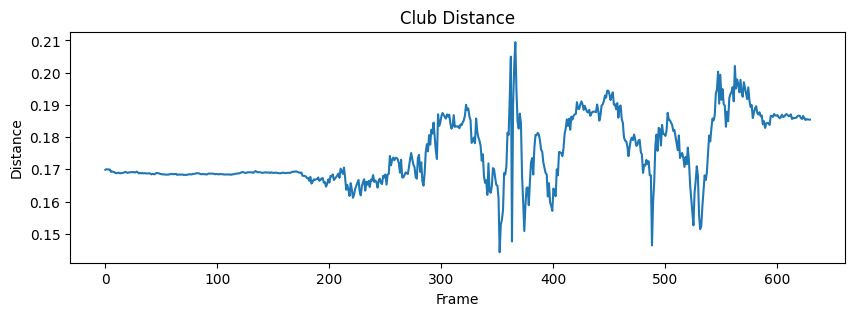

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(df.index, df['CLUB_norm'])
ax.set_title('Club Distance')
ax.set_xlabel('Frame')
ax.set_ylabel('Distance')
plt.show()

In [7]:
df['CLUB_norm'].describe()

count    630.000000
mean       0.175043
std        0.010129
min        0.144266
25%        0.168419
50%        0.169310
75%        0.184636
max        0.209436
Name: CLUB_norm, dtype: float64

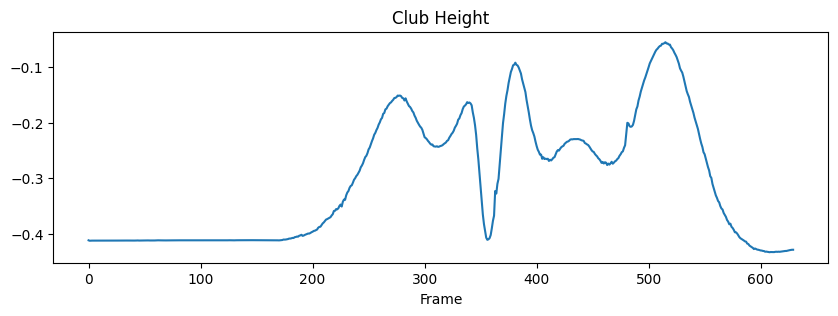

In [8]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(df.index, df['HOSEL_y'])
ax.set_title('Club Height')
ax.set_xlabel('Frame')
plt.show()